# Amazon Sales Data Analysis

###  Data Loading and Inspection

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r'D:\Data Analyst Internship Project\Amazon_Sale_Report.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
# Display the last few rows of the dataset
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [5]:
print('Data has total {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

Data has total 128976 rows and 21 columns.


In [6]:
# Get a statistical summary of numerical columns
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [7]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

Potential Issues & Observations:

Columns with Missing Data: Currency and Amount have 121,176 non-null values, meaning 7,800 entries are missing.
ship-city, ship-state, ship-postal-code, and ship-country have 128,941 non-null values, indicating 35 missing entries.

fulfilled-by Column: Only 39,263 non-null values, meaning most entries are missing (about 89,713 rows).

New and PendingS: These columns have 0 non-null values, which are entirely empty and might need removal.

Date Column: The Date column is currently an object. Converting it to a proper datetime type is recommended for easier manipulation.

Numeric Columns with Potential Issues: ship-postal-code Column: A float64 column likely representing postal codes. Postal codes are usually categorical or string data and might need conversion.

In [8]:
# Check for duplicates
print(f"Number of Duplicates: {df.duplicated().sum()}")

Number of Duplicates: 168


### Data Cleaning and Preprocessing

In [9]:
# Delete index column from dataset because it does not play any role in analysis
df.drop(columns='index',inplace=True)

In [10]:
# Check for the null values in the dataset
df.isnull().sum().sort_values()

Order ID                   0
B2B                        0
Courier Status             0
Size                       0
Category                   0
Qty                        0
Sales Channel              0
Fulfilment                 0
Status                     0
Date                       0
ship-service-level         0
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
currency                7800
Amount                  7800
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [11]:
# Drop the New and PendingS columns from the DataFrame, as they contain only missing values
df.drop(columns=['New','PendingS'],inplace=True)

In [12]:
# Calculate the percentage of missing values for each column
null_percentage = df.isna().mean() * 100

# Sort the columns by percentage of missing values in descending order
top_null_percentage = null_percentage.sort_values(ascending=False).head(7)

# Print the top 7 columns with the highest percentage of missing data
print(top_null_percentage)

fulfilled-by        69.557902
Amount               6.047637
currency             6.047637
ship-country         0.027137
ship-postal-code     0.027137
ship-state           0.027137
ship-city            0.027137
dtype: float64


In [13]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df = df.dropna(axis=1, thresh=threshold)
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False


In [14]:
# Check data type of missing values
df[['ship-country','ship-city','ship-state','ship-postal-code','currency','Amount',]].dtypes

ship-country         object
ship-city            object
ship-state           object
ship-postal-code    float64
currency             object
Amount              float64
dtype: object

In [15]:
# Display the top five rows of the specified columns after filling any missing values
df[['Amount','currency','ship-country','ship-postal-code','ship-state','ship-city']][:5]

,Amount,currency,ship-country,ship-postal-code,ship-state,ship-city
0,647.62,INR,IN,400081.0,MAHARASHTRA,MUMBAI
1,406.00,INR,IN,560085.0,KARNATAKA,BENGALURU
2,329.00,INR,IN,410210.0,MAHARASHTRA,NAVI MUMBAI
3,753.33,INR,IN,605008.0,PUDUCHERRY,PUDUCHERRY
4,574.00,INR,IN,600073.0,TAMIL NADU,CHENNAI


In [16]:
# Check the datatype of the column after imputing the missing values
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

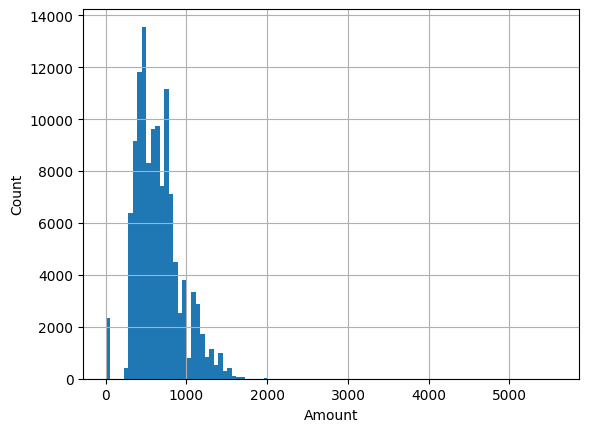

Amount column having skewness : 0.8859651066771677


In [17]:
plt.hist(x=df['Amount'],bins=100)
plt.grid()
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()
print('Amount column having skewness : {}'.format(df['Amount'].skew()))

In [18]:
# Amount column is having skewness and it is not noramlly distribution so we can't use mean as imputation measure so lets go with median in this case.
df['Amount']=df['Amount'].fillna(df['Amount'].median()) # hightly skewed thatswhy median used
df['currency']=df['currency'].fillna(df['currency'].mode()[0])# categorical feature thatswhy mode
df['ship-country']=df['ship-country'].fillna(df['ship-country'].mode()[0]) # categorical feature thatswhy mode
df['ship-postal-code']=df['ship-postal-code'].fillna(df['ship-postal-code'].median()) #right skewed thatswhy median
df['ship-state']=df['ship-state'].fillna(df['ship-state'].mode()[0])# categorical feature thatswhy mode
df['ship-city']=df['ship-city'].fillna(df['ship-city'].mode()[0])# categorical feature thatswhy mode

In [19]:
# Check and remove duplicate records
print('There are total {} duplicate records present in dataset.'.format(df[df.duplicated()].shape[0]))
df.drop_duplicates(inplace=True)

There are total 959 duplicate records present in dataset.


In [20]:
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

In [21]:
# Columns date and postal code is incorrect here we need to convert their data type into right one
df['Date']=pd.to_datetime(df['Date'])
df['ship-postal-code']=df['ship-postal-code'].astype(np.int64)

In [22]:
df.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               int64
ship-country                  object
B2B                             bool
dtype: object

In [23]:
# Rename column name Qty to Quantity
df.rename(columns={'Qty':"Quantity"},inplace=True)

In [24]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

### Exploratory Data Analysis  

#### Sales Overview

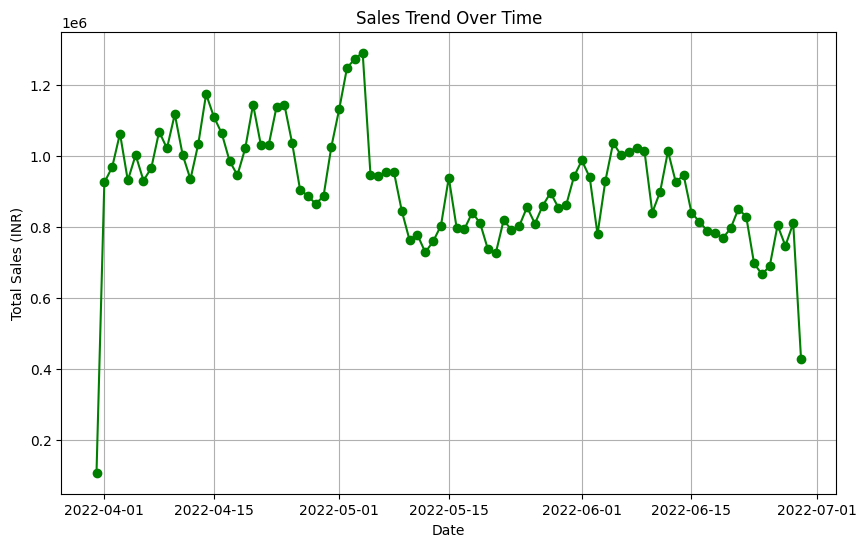

In [25]:
plt.figure(figsize=(10, 6))
sales_by_date = df.groupby(df['Date'].dt.date)['Amount'].sum()
sales_by_date.plot(kind='line', marker='o', color='green')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.grid(True)
plt.show()

#### Product Analysis

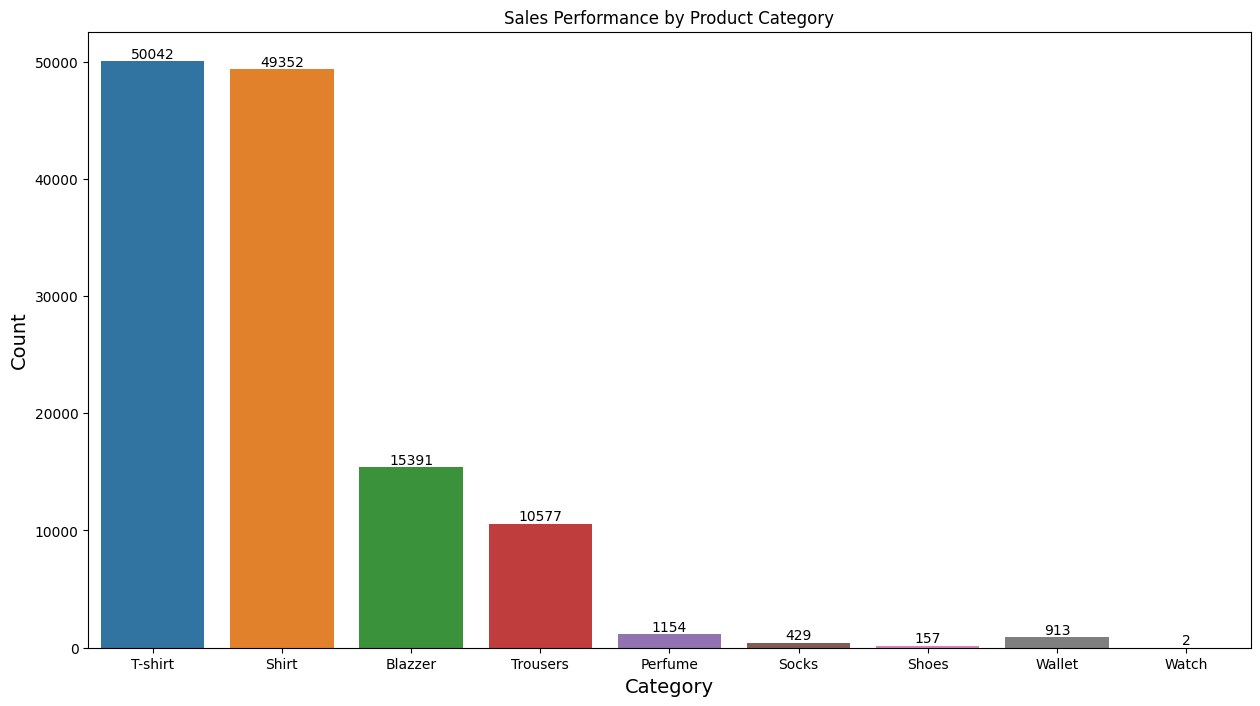

In [26]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='Category',data=df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.xticks()
plt.yticks()
plt.xlabel('Category',size=14)
plt.ylabel('Count',size=14)
plt.title('Sales Performance by Product Category')
plt.show()

Products like T-shirts and Shirts have higher sales volumes

#### Fulfillment Analysis

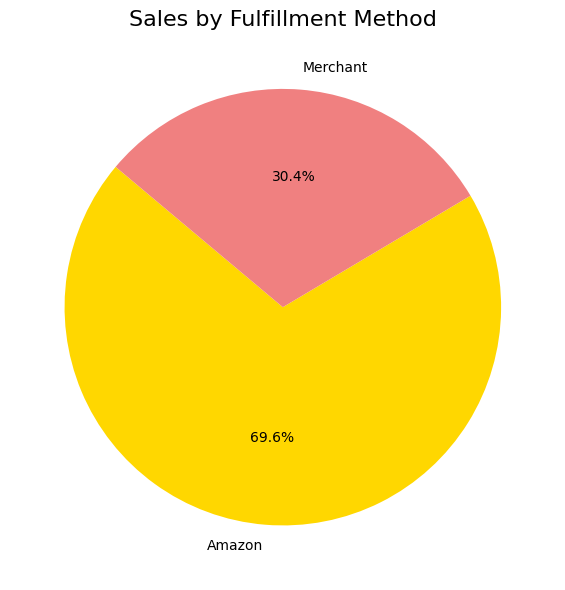

In [27]:
# Fulfillment method preferences
plt.figure(figsize=(8, 6))
fulfillment_sales = df.groupby('Fulfilment')['Amount'].sum()
fulfillment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Sales by Fulfillment Method', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

We can see that most of the orders are fullfilled by Amazon and remaining order are fullfilled by Merchant

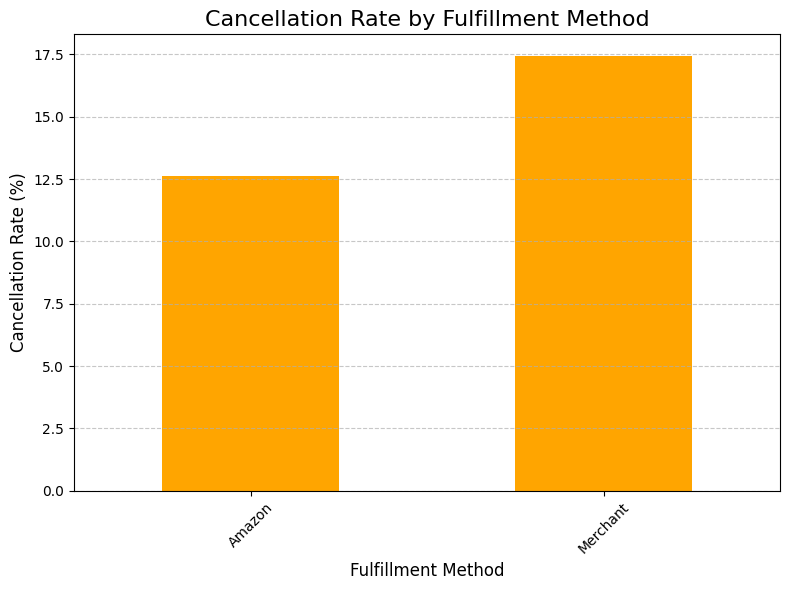

In [28]:
# Cancellation rates by fulfillment method
plt.figure(figsize=(8, 6))
cancelled_orders = df[df['Status'] == 'Cancelled'].groupby('Fulfilment')['Order ID'].count()
total_orders = df.groupby('Fulfilment')['Order ID'].count()
cancellation_rate = (cancelled_orders / total_orders) * 100
cancellation_rate.plot(kind='bar', color='orange')
plt.title('Cancellation Rate by Fulfillment Method', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Customer Segmentation

True : Business To Business Sales

False : Business To Consumer / Retail Sales

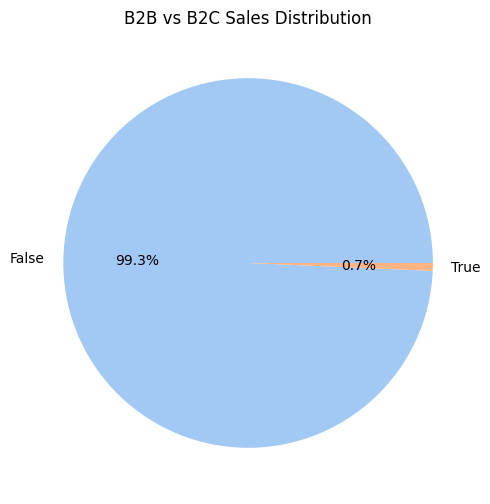

In [29]:
# B2B vs B2C Sales
plt.figure(figsize=(10,6))
b2b_counts = df['B2B'].value_counts()
b2b_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('B2B vs B2C Sales Distribution')
plt.ylabel('')
plt.show()


#### Geographical Analysis

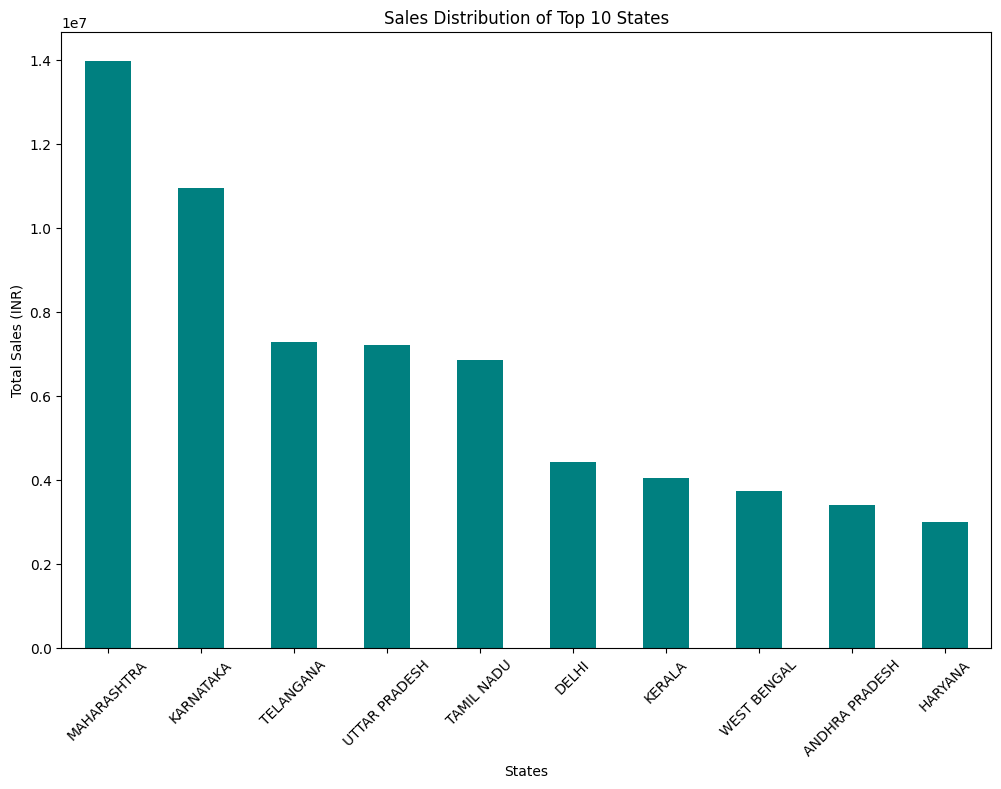

In [30]:
plt.figure(figsize=(12, 8))
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='bar', color='teal')
plt.title('Sales Distribution of Top 10 States')
plt.xlabel('States')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()

Maharashtra and Karnataka are major contributors to sales

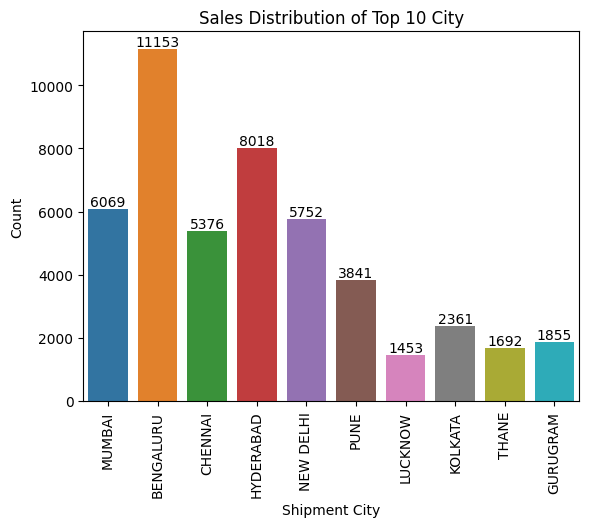

In [31]:
top_10_city=df['ship-city'].value_counts().sort_values(ascending=False).head(10).index
ax=sns.countplot(x='ship-city',data=df[df['ship-city'].isin(top_10_city)])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Shipment City')
plt.ylabel('Count')
plt.title('Sales Distribution of Top 10 City')
plt.xticks(rotation  = 90)
plt.show()

Cities like Mumbai and Bengaluru are major contributors to sales

#### Shipment Analysis

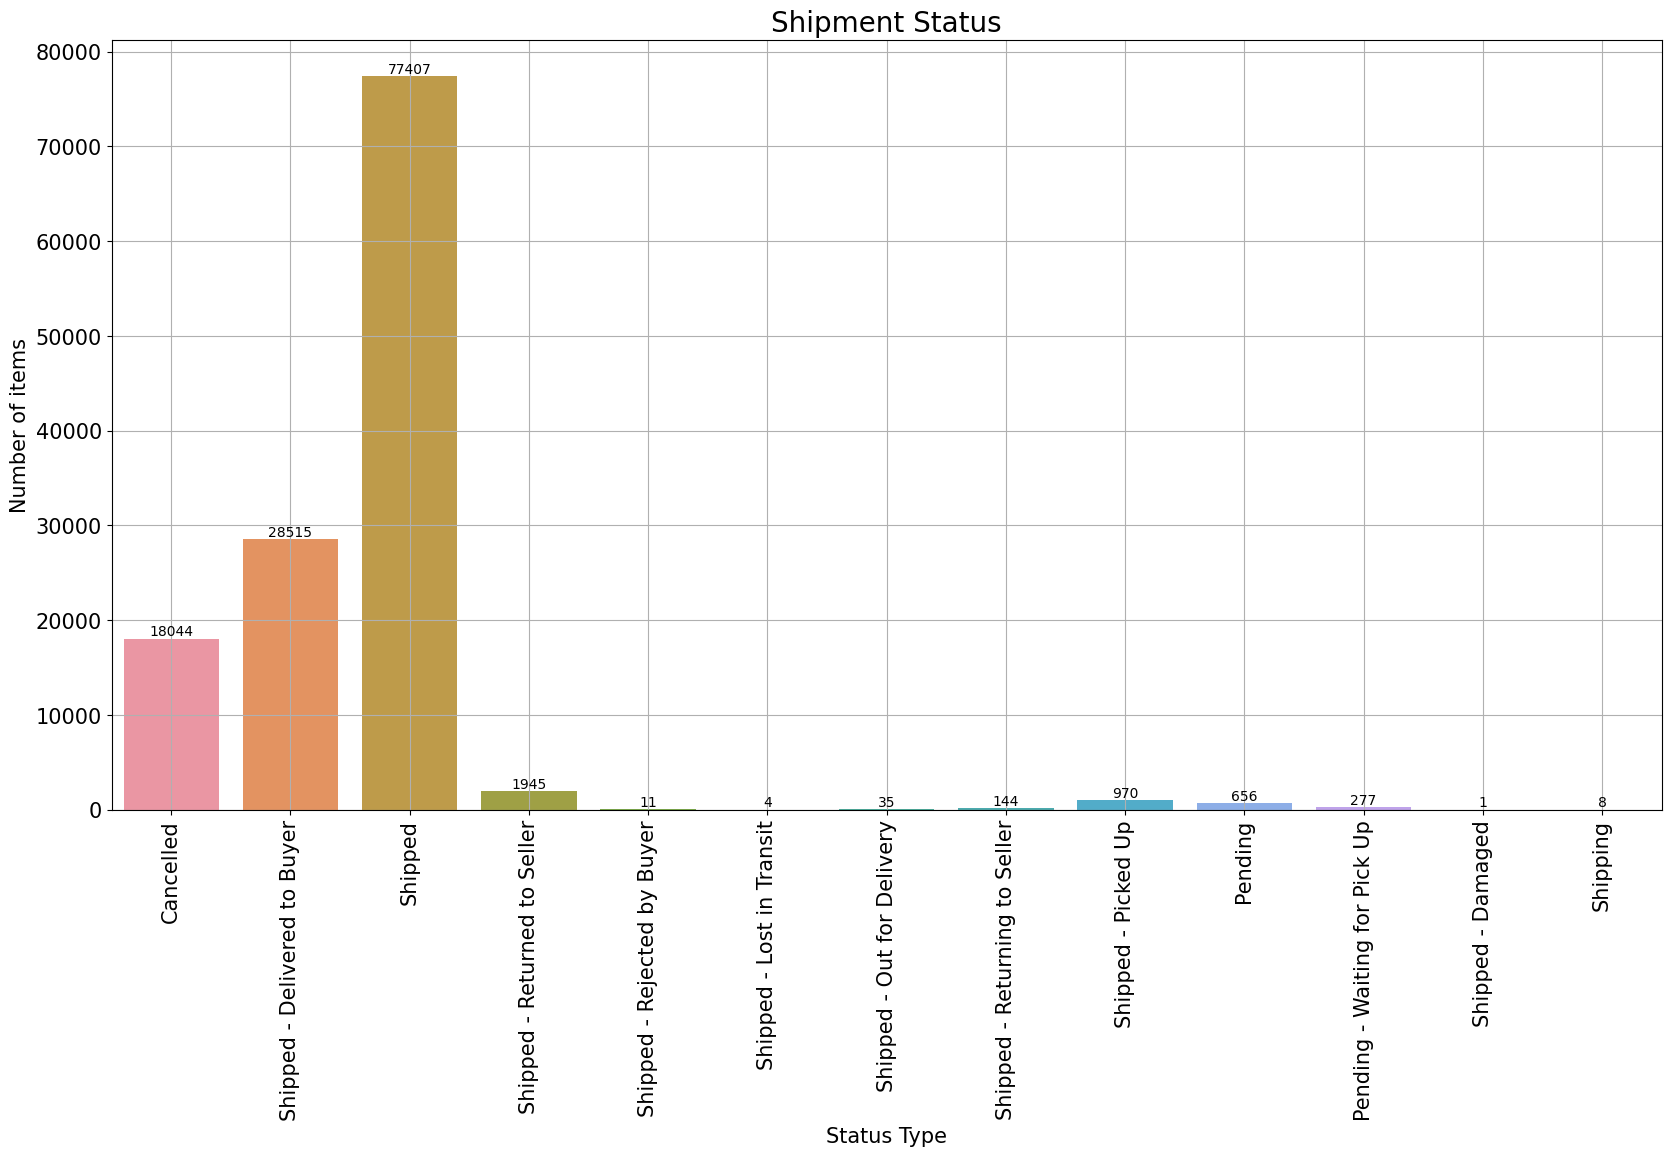

In [32]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Status',data=df,)
for val in ax.containers:
    ax.bar_label(val)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.xlabel('Status Type',size=15)
plt.ylabel('Number of items',size=15)
plt.grid()
plt.title('Shipment Status',size=20)
plt.show()

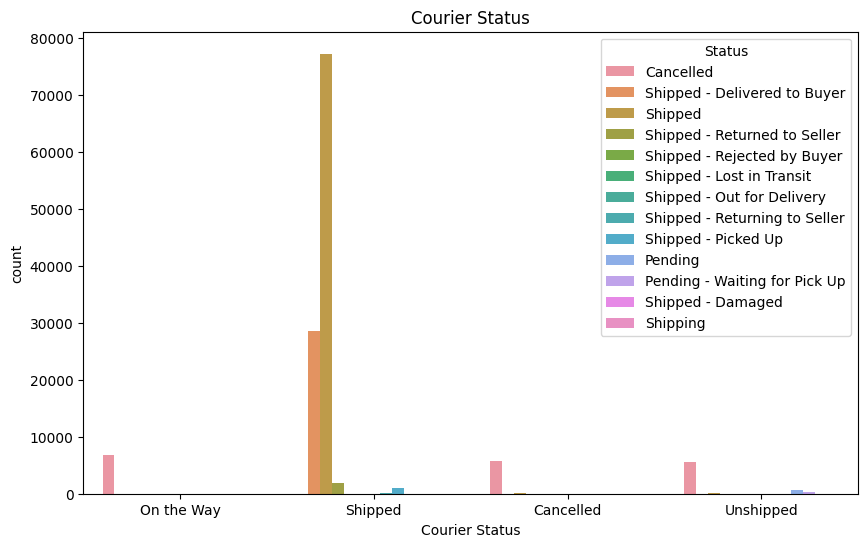

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Courier Status',hue='Status')
plt.title('Courier Status')
plt.show()

###  Saving Analysed Data

In [34]:
# Save only the required columns for Tableau
analyzed_data = df[['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B']]

analyzed_data.to_csv(r'D:\Data Analyst Internship Project\analyzed_sales_data.csv', index=False)

###  Business Insights

###  Recommendations

###  Conclusion

This analysis provides a comprehensive understanding of sales patterns, customer preferences, and operational efficiency. By focusing on popular product categories, optimizing fulfillment methods, targeting underperforming regions, and adjusting shipping strategies, the business can maximize revenue and improve customer satisfaction. Taking actionable steps based on these insights will help streamline operations, increase customer retention, and drive growth in the competitive e-commerce space.